# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


/Users/gta/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/gta/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

 **Answer Question 1:**

In general, I have seen that the main driver of home prices is the quality of the school district.  Of course there are other attributes that factor into the selling price of a home, like the size, or in this case, the `'RM'` values, however, from what I have seen, the main driver is the quality of the school district. 

As to the `'RM'` values. All else being equal, I expect that a high `'RM'` value to have a higher value than a smaller one.  The reason for this, is that the `'RM'` value is proportional to the overall size of the home, and in general, large homes do sell for more. 

As to the 'LSTAT'` values.  Again, all else being equal, I expect that a home in a neighborhood with a lower 'LSTAT'` value to have a **higher value** than one with a higher value.  The reason for this is that neighborhoods are generally clusters of people in the same income bracket, therefore, a higher `'LSTAT'` value means that there is more people of a lower class in that neighborhood.  In addition, the home values of folks that are of a lower class are generally lower since their incomes are lower.

As to the `'PTRATIO'` values. School overcrowding can be one metric that gauges the cost/value of a home since overcrowded class rooms are typically seen in lower class/cost areas (this can be related to the overall quality of an education as well).  That being said, I expect that lower `'PTRATIO'` values to result in a higher home price since the quality of the education tends to also be higher in these situations.  Like I said at the start:

> In general, I have seen that the main driver of home prices is the quality of the school district. 

**Notes from reviewer**

>Great work getting the summary statistics. However, the purpose of this section is to introduce you to the efficient numpy package. Please use the functions available in numpy package and rewrite the respective code lines.

>Correct. You have captured the concept of correlation accurately here. There are many types of correlation in statistics actually. Do you know what kind of correlation you have described in your answer? Check out the following link to find out:
http://www.statisticssolutions.com/correlation-pearson-kendall-spearman/

**Response**

This has been addressed. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict) 
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer Question 2:**

The calculated `'r^2'` score (`'0.923'`), means that 92.3% of the variance in the dataset can be predicted by the independent variables. That being said, **I do** consider this model to have captured the variation of the target variable. 


**Notes from reviewer**

>Why do you think so? Try focusing on defining what R^2 means, how is it calculated, what is the range of values it can assume and then compare the output with the range to justify your answer.

>R-squared value is the percentage of the response variable variation that is explained by a linear model:

>R-squared = Explained variation / Total variation

>In the target variable, there is some variation contained. The model is trained to learn pattern from the independent variables and try to explain the variation in target variable.

>Total sum of squares (SST)= sum of squares explained by regression model(SSR) + sum of squared errors(SSE)
>1 = (SSR/SST) + (SSE/SST)
(SSR/SST)=1-(SSE/SST)
R^2 = (SSR/SST) =1-(SSE/SST)

>Please modify your answer to demonstrate this understanding.

**Response**

In general, the `'r^2'` value is a measure of how well did the model fit the data in the dataset and the `'r^2'` value is always between 0 and 1 (or 0% and 100%).  Descriptively, the `'r^2'` value quantifies the proportion (or amount) of the *variance* in the dependent variable that can be predicted from the the independent variable.

For example, in any dataset, there is going to be a variance that is contained in the dataset.  And in the case of linear regression, the goal is to relate the independent variable in a way that predicts the dependent variable using a linear manner while preserving all of the variability in the initial dataset.  

How well does the data ends up fitting to this line, is described by the `'r^2'` value. For example, a calculated `'r^2'` score of `'0.923'`, means that 92.3% of the variance in the dataset can be predicted by the independent variables and the values between the observed and predicted value are relatively small. 

That being said, **I do** consider this model to have captured the variation of the target variable. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=42, shuffle=True)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer Question 3:**

The benefit of using `'train_test_split'` in modeling is that it allows you to ensure that the model does not over- or under-fit the data since you will evaluate the model using data (i.e., the `'test'` set) that the model has not seen.  This in-turn ensures that the model is able to generalize well to out of sample data. 

**Notes from reviewer**

>Great implementation. How ever, the train/test split has no definitive impact on whether a model will over fit or underfit.
Consider the following example:

>How good will be the learning for a model totally depends on how much relevant information is contained in the data set. DO you think a train data set with 80,000 rows and test data of 20,000 rows result in a better trained model? How about 70,000 and 30,000? Well, we can't say anything about that definitively.

>What if the data is about some sensor readings and it senses environment 100 times in a second. So for one second of time, 100 rows would be present. That means 100,000 (80,000+20,000) would represent 1000 seconds data only which means data of about 16.66 minutes. Would you expect this model trained on ~16.66 minutes to perform well 24x7x52 (round the year?). Obviously not. Here we need more data to get a better trained model and not a good split or a split at all!

>When it comes to measuring generalization, we do it by observing the model performance on a data set which has not been seen by the ML model. When we are talking about the model evaluation on the unseen data, we would need the true values for that unseen data for us to compare the model predictions with. If we train the model on the whole available data set, would we be able to check its performance on unseen data set? Modify your answer to reflect above mentioned points.

**Response**

The benefit of using `'train_test_split'` is to determine how well does a model perform on data that it has not seen.  The *cardinal rule* of machine learning is to not test the model on data that the model has already seen since that could introduce biases into the model. 

The best way to evaluate model performance is to test the model on data that it has not seen.  Given that the amount of that we have to work with can be limited, meaning that it may not be possible to get more, one way to both, quantify model performance and not break the cardinal rule of machine learning is to split your initial data set into testing and training sets using the `'train_test_split'` function in SK Learn.  

The `'train_test_split'` function will take the initial data set and split it into two, a training set, that is used to train the model, and a testing set, that is used to evaluate the performance of the model. When using `'train_test_split'`, the testing data is data that the model has not seen before (i.e., has not been used to train the model). 

As it relates to under fitting or overfitting, when we split the initial dataset into two using `'train_test_split'`, we are able to determine overfitting or under fitting using the model complexity curves since for each point in the testing set, we'll know both the actual and predicted values of each point that is used to base predictions (independent variable) off of (this is the validation score or curve).  The other curve that is needed for a model complexity chart is the training score, that is generated from the training set.  


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

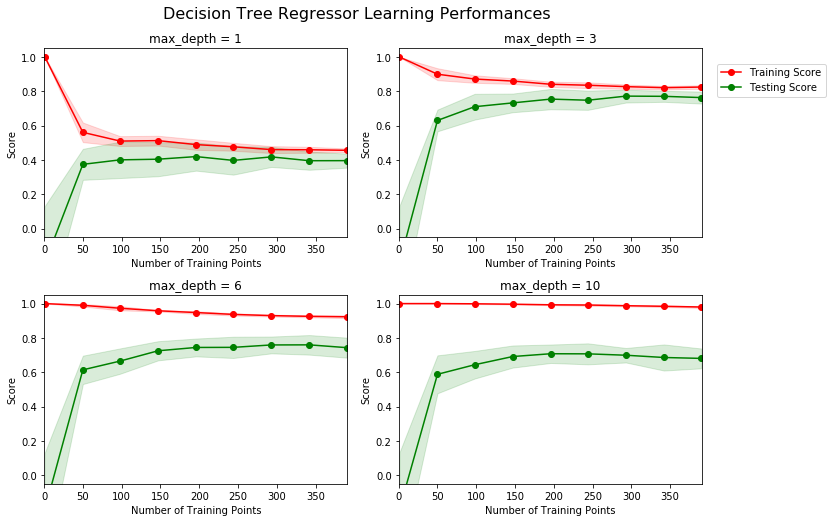

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer Question 4:**

From the four charts presented, the one where `'max_depth=1'` seems to fit the data best.  The reason being that the for `'max_depth=1'`, the error of the `'training'` and `'testing'` sets are converging to a lower number, than say,  `'max_depth=3'`. In passing, the charts for `'max_depth=6'` and `'max_depth=10'` don't seem to be converging. 

If you add more points to the datasets, the training error should increase since there is more data to fit, however, the testing error should decrease since we have a better model that has been trained with more data. 

In general, having more training data increases the training error, however, in the long run, you will have a better model since has seen more points, and is more likely to generalize better since it has the ability to pick up all of the nuances in the dataset. 

It is noted that there is a point at which the training and the testing curves to approach each other (with a very small distance between them). In this case, adding more training data to the model, may not result in a better training score. 

**Note from reviewer**

>Your answer is giving me a feeling that you think that the model error is plotted on Y-axis. But if you see closely, Y-axis represents the model score (performance ) and not the error. In the light of this fact your answer should change. Also, after a particular value of number of training points, the training and testing curves have flattened out. That means for any number of training points, the score would remain the same. Do you think adding more points would help given the above observation?

**Response**

It is understood that the value of the y-axis is the "score" as opposed to the "error."  As to the value of the value of the `'score'`, I believe that the value that is being reported is the `'F1'` score. That being said, the model that has `'max_depth=3'` offers the model that classifies the points the best, since it has the highest `'F1'` score that also converges to each other. 

As to the question "Do you think adding more points would help given the above observation?".  I offer the following, that was noted in my initial response.

>It is noted that there is a point at which the training and the testing curves to approach each other (with a very small distance between them). In this case, adding more training data to the model, may not result in a better training score. 

Therefore, in the areas of the learning curve that are at the far right, the charts suggest that adding more data to the model, may not result in a better training score.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

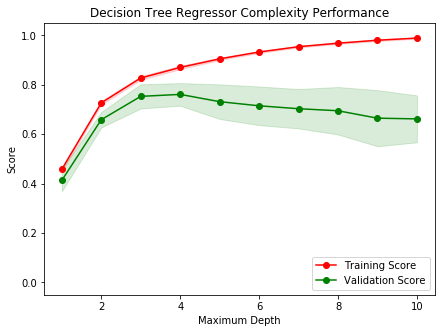

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer Question 5:**

As to the chart with `'max_depth=1'`, I wold say that the is the sweet spot for the model since the error is at the minimum.  It seems that as the `'max_depth'` approaches four, that the model starts to show high bias (underfit), but as the depth increases, the model starts to show high variance or overfitting.

The key clues that show that the model is over fitting is the the distance between the training and testing scores, on the complexity chart, is getting larger. Visual clues that a model is underfit is that the delta between the training and testing scores are small, however, the point at where they converge is not at the minimum. 

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer Question 6:**

The model that uses  `'max_depth=1'` would generalize the best to unseen data.  The reason for that is two fold.  First, the delta between the training and testing scores are small, and second, the score at which the training and testing points converge to is at the minimum compared to all of the other `'max_depth'` values. 

This also makes sense given that the best models are the simplest models. 

**Note from reviewer**

>1. Same observational error has occurred here. Y-axis represents the model performance and not the error. This instance reminds me of a popular quote:
"Analysis is objective but the interpretation is subjective!"

>2.  Due to error in recognizing that Y-axis represents the score, this answer also needs a relook from you.

**Response**

As to point 1.  Noted.

As to point 2. After reviewing the complexity chart again, it appears that the model with `'max_depth=3'` is best since the values of the `'F1'` score for both the training and validation sets are the highest and are close to each other.  Qualitatively, a `max_depth=3` allows the delta between the testing and validation sets to be the smallest, while the `'F1'` is at a maximum. In passing, a `'max_depth=10'` is not ideal since the delta between the testing and validation sets is large.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer Question 7:**

A grid search is a technique to optimize a model by changing the hyperparamters of the model, recording the performance of the change on the model (e.g., like the F1 score), and then selecting the set of hyper parameters that creates the best performing model. 

As an example, for a random forest, one of the hyper parameters that are available in scikit learn (SK Learn) is `'max_depth'`. 

All of the hyper parameters that can be used for a [random forest (from SK Learn)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) is shown below.

```
class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, 
splitter=’best’, max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
min_impurity_split=None, class_weight=None, presort=False)

```

The `'max_depth'` parameter specifies how many nodes or levels to have on the decision tree.  As it relates to model performance, having more nodes/levels can affect the ability of the model to generalize well.  Therefore, when changing the `'max_depth'` parameter, it is possible to see the impact of the change when looking at the `'F1'` score that is produced when the testing data is used on the model.  

Specifically, in some cases, increasing the `'max_depth'` value can lead to a higher `'F1'` score, which is an indication that the model is performing better on the testing data. 

**Note from reviewer**

>Your answer suggests that you are associating F1 score with grid search very closely.

>Please understand that F1 score is the harmonic mean of precision and recall. Precision and recall are found out from confusion matrix which itself is found out for classification problems only. Thus, F1 score as a model evaluation metric becomes applicable only for classification problems.In general, depending on the type of problem, regression or classification, the evaluation metric is chosen. Please modify your answer to reflect this understanding.

>Also, I am sure you do understand the difference between parameters and hyper-parameters as these two concepts are different and the terms are not interchangeable.

**Response**

Noted. 

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer Question 8:**

When assessing model performance, it is important that the model be tested on data that the model **has not** seen.  The reason for this is that you don't want to introduce bias into the model that could affect the ability to generalize. As a result, it is common practice to split the data up into training and testing sets as in the case of `'train_test_split'` in SK Learn. 

In `'train_test_split'`, the testing set, is always going to be the same data points. Since the goal of building a model is to have a model that generalizes on out of sample data, it is possible, that biases could be introduced into the dataset when doing `'train_test_split'` since the testing and training set will always include the same datapoint. 

To get around this potential source of bias, it is customary to test the performance of the model using different points in the testing and training set.  The problem here, however, is that we only have a set amount of data points, and the cardinal rule is to never test a model using data points that the model has already seen. 

To solve this problem, one can use k-fold cross validation.  In k-fold cross validation, the data set is sub divided into `'k'` divisions of equal size. Once the divisions have been made, the model is trained with `'k-1'` data points, and the then tested with data from the k<sup>th</sup> subdivision.  

This process is repeated for `'k'` times and an accuracy or `'F1'` score computed for each step.  Once the model has been trained and evaluated `'k'` times, the average performance is provided and used to describe the model.  Put in another way, k-fold cross validation ensures that the training and testing of the model is homogeneous across all of the data points, while still complying with the cardinal rule of next testing a model using data points that the model has already seen during the testing phase. 

As to the use of cross validation and grid search. As noted in the [SK learn documentation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation):

> When evaluating different settings (“hyper parameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. 

To ensure that the model does not inadvertently learn about nuances of the dataset when going through a grid search, cross validation is used since model performance will be judged over a series of `'k'` times thereby removing the ability of the model to learn about nuances of the dataset.

**Note from reviewer**

>Great explanation. There are certain finer details of this concept, which you should know and which should be part of your answer. Let me explain as these are the points generally asked in Data Science / Machine Learning interviews.

>K-fold CV is an algorithm validation technique: whether a given algorithm will train properly or not. When you get different models from different folds, what you do is average out the evaluation metric of all the models to get what?

>Well, to get an 'unbiased estimate of model generaliztion on unseen data'. That is the main purpose of k-fold cross validation. Once we are satisfied that a particular algorithm is good for a particular data set, we test it on the dataset we had kept aside at the beginning.

>A bit about k-fold using an example:

>Let us assume we have 100 rows in total. Out of these 100 rows, let us say 20 rows are taken out for final testing of the model and 80 rows are kept for training. Now these 80 rows are divided into k-folds. If we assume k to be 10, then each fold consists of 8 rows. Now out of these folds, one fold having 8 rows is kept as validation and rest 72 rows are used as training. This process is repeated with each fold being one validation set. Once we are sure about our model, the final model performance is check on the 20 rows we had taken out in the beginning.

>Its application on grid -search:

>We take one hyperparameter combination from the grid and keep it constant for one round of whole k-fold cross validation process: the whole splitting into kfolds, training and validating on one fold and so on. This helps us in getting an unbiased estimate of model evaluation metric which helps us decide in a more unbiased way, whether the given combination of hyperparameters is best for the particular data set or not. This process is repeated for all combinations of hyperparameters in the grid.

>Using the train-test split method to evaluate model or choose best hyper parameters has a risk. The data set in the fixed train-test method may result in optimum hyper-parameter combination which is good for only that particularly arranged training dataset. To get rid of this bias towards a specific arrangement and composition of data, k-fold becomes useful.

**Response**

Noted.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=42)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, param_grid =params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

reg.get_params()['max_depth']

# Produce the value for 'max_depth'
# print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

4

** Hint: ** The answer comes from the output of the code snipped above.

**Answer Question 9:**

From the results from grid search, it seems that the best model is one that has `'max_depth = 4'`.  As it relates to the *guess* that has made in Question 6, it seems that a `'max_depth = 4'` would not have been expected to produce the best results since the error has not been minimized. As noted from Question 6:

> The model that uses  `'max_depth=1'` would generalize the best to unseen data. 

**Note from the reviewer**

>Your expectation about max_depth = 4 not being a good value for the parameter would change when you read the evaluation curves and complexity curve considering Y-axis as the score and not the error.

**Response**

As to the expectation regarding a model with `'max_depth=4'`. The results from the grid search reveal that a model with `'max_depth=4'` is best.  When reconsidering the learning and complexity curves, this does make sense, since a the learning curve of `'max_depth=3'` produces the highest `'score'` that shows both curves converging to each other.  

In addition, as noted earlier:

>[a] `max_depth=3` allows the delta between the testing and validation sets to be the smallest, while the `'F1'` is at a maximum. In passing, a `'max_depth=10'` is not ideal since the delta between the testing and validation sets is large.

The assumption is that a learning curve of `max_depth=4` will look like the learning curve of `max_depth=3`.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer Question 10:**

The model has predicted the three home prices for each client.

```
Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36
```

As it relates to the response provided in question 1, all it seems that my intuition and the model are in agreement for the following three reasons.

First, I noted that:

> [I] expect that lower `'PTRATIO'` values to result in a higher home price since the quality of the education tends to also be higher in these situations.

The home predictions follow that trend, since there is a 12-to-1 student ratio for client 3. 

Second, I noted that:

> [I] expect that a home in a neighborhood with a lower 'LSTAT'` value to have a **higher value** than one with a higher value.

Again, the home predictions follow this trend since there is a 3% poverty rate for client 3 and a 22% poverty rate for client 2.

Finally, I noted that:

> I expect that a high `'RM'` value to have a higher value than a smaller one.

The home prediction for client 3 follows this trend since it has the most bedrooms, as well as the highest predicted selling price.  Client 2 has the smallest house as well a the lowest selling price.

**Notes from the reviewer**

>Great work considering the correlation with the feature values. This answer will become perfect when you also blend in the information about the summary statistics which you calculated in the very first code block.

** Response **

The model has predicted the three home prices for each client.

```
Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36
```

As it relates to the response provided in question 1, all it seems that my intuition and the model are in agreement for the following three reasons.

First, I noted that:

> [I] expect that lower `'PTRATIO'` values to result in a higher home price since the quality of the education tends to also be higher in these situations.

The home predictions follow that trend, since there is a 12-to-1 student ratio for client 3. Specifically, the home price for client 3 is near the maximum of the prices in the dataset (above average).

Second, I noted that:

> [I] expect that a home in a neighborhood with a lower 'LSTAT'` value to have a **higher value** than one with a higher value.

Again, the home predictions follow this trend since there is a 3% poverty rate for client 3 and a 22% poverty rate for client 2.  When considering the summary statistics mentioned earlier, the predicted home price is below average of the prices in the dataset. 

Finally, I noted that:

> I expect that a high `'RM'` value to have a higher value than a smaller one.

The home prediction for client 3 follows this trend since it has the most bedrooms, as well as the highest predicted selling price.  Client 2 has the smallest house as well a the lowest selling price.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer Question 11:**

In this project, we trained a model to predict the selling home price in Boston.  While predictions are made from what seems to be a robust model, care should be exercised when solely relying on this model to make predictions for the following reasons.

First, the data used to train the model was collected in 1978.  Home prices have changed from 1978, due to inflation, and this must be considered when using this model.  One possible correction is to correct the predicted price to 2018 dollars using a standard rate of inflation. 

Second, calculating the actual price of a home is a complex endeavor that can use multiple inputs or features.  In this model, we have built a model that uses only three features to predict the home price, but there are indeed others that can be used. One of these additional features is the crime rate of the neighborhood.  While more features can be certainly added to the model, one must exercise care because not all features added to the model are valuable.  It is possible to add more features to the model and at the same time add more noise to the model.  To get around this, is is best to look at the importance of each feature to the model.

Third, while the model does make predictions, it should be noted that the model may be overfit given the `'max_depth=4'` value.  When looking at the chart from Question 6, it suggest that the model may be overfit relative to a `'max_depth=1'`.  To ensure that the model is not overfit, I would run the complexity analysis again, but use the results from a 10-fold cross validation as opposed to points generated from the `train_test_split`.

Fourth, the model does not consider the fact that Boston is a urban city and people may want to use the model to predict home prices in a rural setting. Home prices in a rural setting may be lower and therefore, this model could estimate higher prices in a rural setting. 

Fifth, in my opinion, it is not 100% fare to judge a home price solely by the characteristics of the entire neighborhood, although, in my experience, this does play a strong component in the overall price.  A new home in a poor neighborhood may be priced artificially low, even if it has a high amount of bedrooms.

In all, while models can make predictions about future events, care must be exercised when relying on the data.  It is important to have context about the data used to create the model as well as domain knowledge when using or building a model to ensure that the output of a model is used correctly. 

**Notes from the reviewer**

>Great answer. You would need to change your third points when you read the graphs correctly.

**Response**

In this project, we trained a model to predict the selling home price in Boston.  While predictions are made from what seems to be a robust model, care should be exercised when solely relying on this model to make predictions for the following reasons.

First, the data used to train the model was collected in 1978.  Home prices have changed from 1978, due to inflation, and this must be considered when using this model.  One possible correction is to correct the predicted price to 2018 dollars using a standard rate of inflation. 

Second, calculating the actual price of a home is a complex endeavor that can use multiple inputs or features.  In this model, we have built a model that uses only three features to predict the home price, but there are indeed others that can be used. One of these additional features is the crime rate of the neighborhood.  While more features can be certainly added to the model, one must exercise care because not all features added to the model are valuable.  It is possible to add more features to the model and at the same time add more noise to the model.  To get around this, is is best to look at the importance of each feature to the model.

**Third, from the learning and complexity curves, it appears that the model is robust enough to make predictions (using a `'max_depth=4'`) since the `'F1'` scores produced using `'max_depth=4'` are the highest.  As one final check, however, I would rerun the model at `'max_depth=4'` but determine the average `'F1'` score from from a 10-fold cross validation as opposed to points generated from the `train_test_split`.**

Fourth, the model does not consider the fact that Boston is a urban city and people may want to use the model to predict home prices in a rural setting. Home prices in a rural setting may be lower and therefore, this model could estimate higher prices in a rural setting. 

Fifth, in my opinion, it is not 100% fare to judge a home price solely by the characteristics of the entire neighborhood, although, in my experience, this does play a strong component in the overall price.  A new home in a poor neighborhood may be priced artificially low, even if it has a high amount of bedrooms.

In all, while models can make predictions about future events, care must be exercised when relying on the data.  It is important to have context about the data used to create the model as well as domain knowledge when using or building a model to ensure that the output of a model is used correctly. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.